In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

Считаем датафрейм с данными по ирису

In [ ]:
iris = pd.read_csv('https://stepik.org/media/attachments/course/57984/iris.csv', sep=',',index_col=0)
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Набор данных состоит из длины и ширины двух типов лепестков Ириса: sepal и petal<br>
Целевая переменная - это сорт Ириса: 0 - Setosa, 1 - Versicolor,  2 - Virginica.<br><br>
Соответственно, наша задача будет - по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

## Анализ данных

In [ ]:
# Объем данных
iris.shape

(150, 5)

In [ ]:
# Статистика
iris.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Построим зависимость "sepal width" и "sepal length" и раскрасим точки в зависимости от типа ириса.

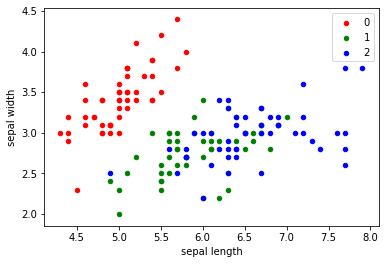

In [ ]:
# можем использовать встроенные пандасовские графики
ax = iris[iris.species==0].plot.scatter(x='sepal length', y='sepal width', color='r', label=0, figsize=(6, 4))
iris[iris.species==1].plot.scatter(x='sepal length', y='sepal width', color='g', label=1, ax=ax)
iris[iris.species==2].plot.scatter(x='sepal length', y='sepal width', color='b', label=2, ax=ax)

/home/julia/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


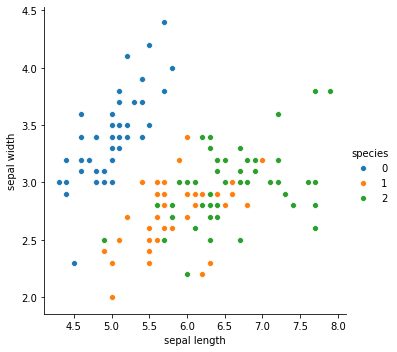

In [ ]:
# или метод из библиотеки seaborn
sns.FacetGrid(iris, hue='species', size=5).map(sns.scatterplot, "sepal length", "sepal width").add_legend()

По одной зависимости мало что можно сказать, поэтому строим таблицу с зависимостями между всеми признаками и целовой переменной, и раскрашиваем точки в зависимости от сортов Ириса

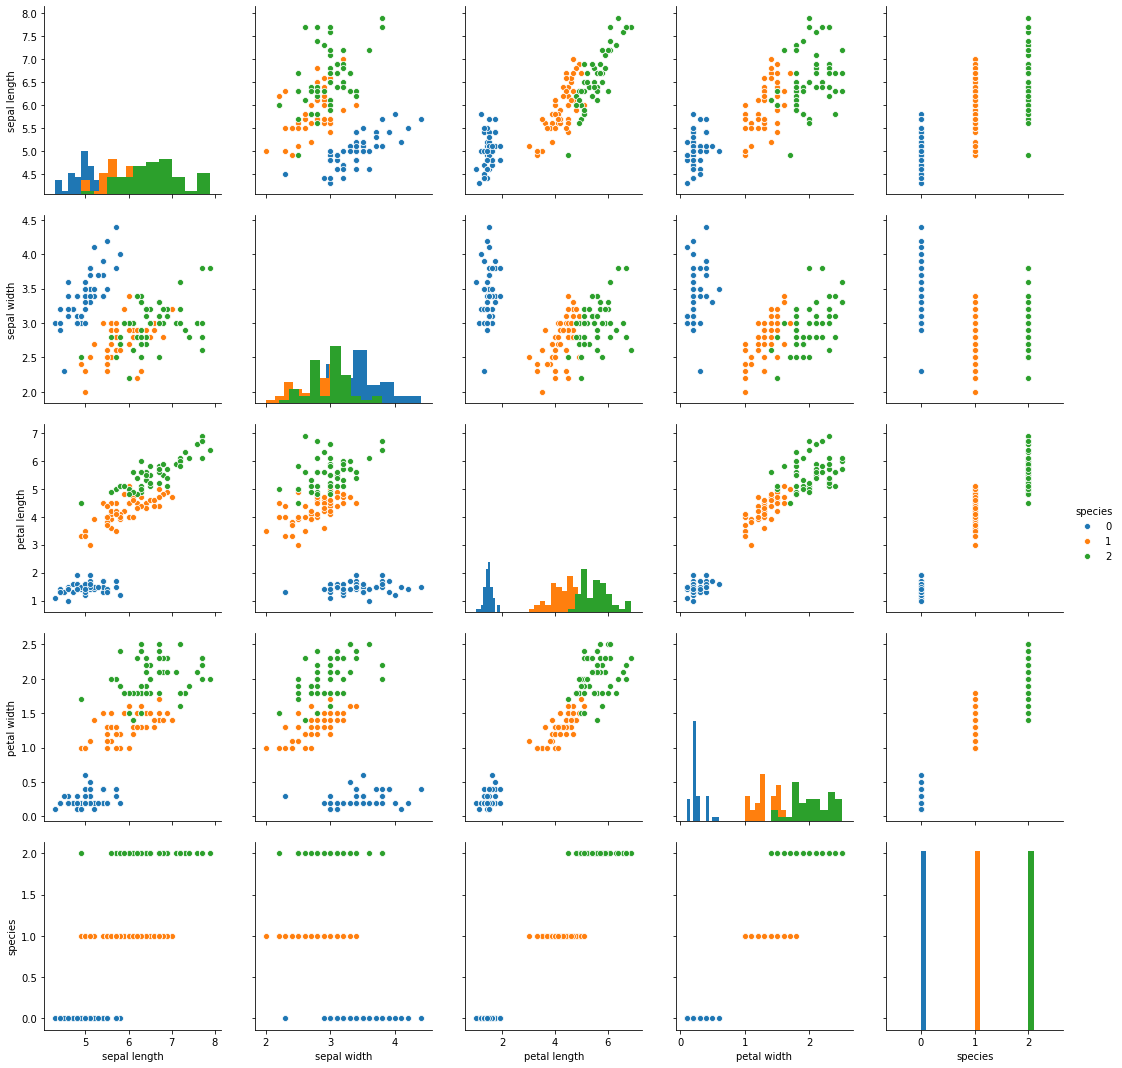

In [ ]:
# анализ отношений между типами по всем комбинациям признаков

sns.pairplot(iris, hue="species", height=3, diag_kind="hist")

Видно, что "petal width" и "petal length" имеют сильную зависимость - точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы достаточно компактно.<br><br>
А вот, например, с помощью переменных  "sepal width" и "sepal length" качественную классификацию не построить, т.к. точки относящиеся к сортам 1 и 2 перемешаны между собой.

## Зависимость между переменными

Посмотрим на математические значения зависимостей

In [ ]:
iris[['sepal length','sepal width','petal length','petal width']].corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


В более наглядном виде - строим тепловую карту зависимости признаков:

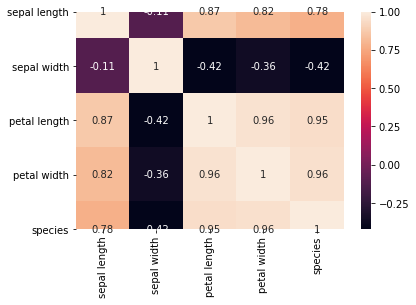

In [ ]:
iris_corr = iris.corr()
sns.heatmap(iris_corr, annot=True);

Значения коэффициента корреляции интерпретируются следующим образом:

·        До 0,2 - очень слабая корреляция

·        До 0,5 - слабая

·        До 0,7 - средняя

·        До 0,9 - высокая

·        Больше 0,9 - очень высокая

Действительно видим, что между переменными "petal length" и "petal width" выявлена очень сильная зависимость 0.96. 

## Целевая переменная

Эту переменную и будем пытаться предсказывать

In [ ]:
# Количество типов ириса

iris['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

Визуализируем распределение 

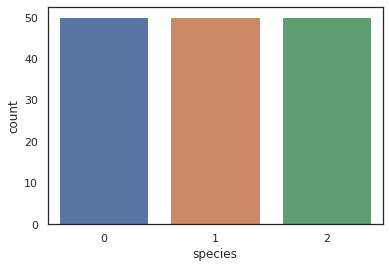

In [ ]:
sns.set(style="white") 
sns.countplot(x='species', data=iris);

In [ ]:
# Данные для обучения и тестовые данные 

In [ ]:
# Разделение признаков и целевой переменной

Y = iris['species'] # предсказывать будем тип ириса

X = iris.drop(columns='species') # данные для обучения возьмем все признаки, естественно без самой целевой переменной

In [ ]:
# импортим метод позволяющий разделить выборку из модуля model_selection библиотеки scikit-learn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10, shuffle=True)
# можно передавать random_state (число int), таким образом мы можем быть уверенны,
# что выборка делится всегда одинаково, что может пригодится для проверки качества модели

Проверим, что выборка разделилась нормально

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

И посмотрим на распределение признаков

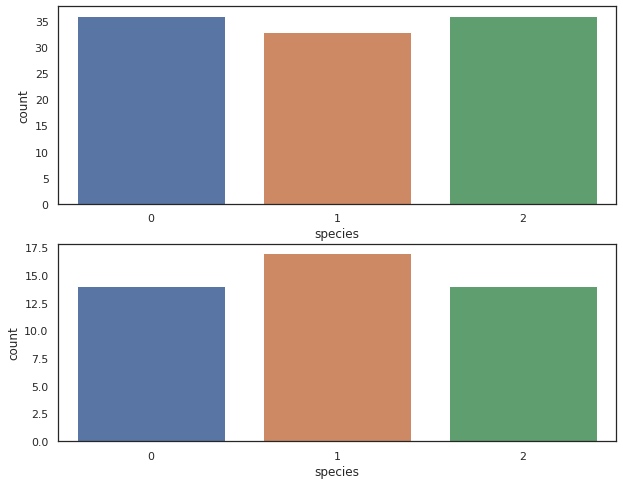

In [ ]:
fig, ax = plt.subplots(2, figsize=(10, 8))
sns.countplot(y_train, ax=ax[0])
sns.countplot(y_test, ax=ax[1])

## Обучение модели

In [ ]:
# импортируем дерьвья из библиотеки scikit-learn
from sklearn.tree import DecisionTreeClassifier

# создаем наш классификатор и посмотрим, что у него внутри
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy')
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
# обучение модели
tree.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

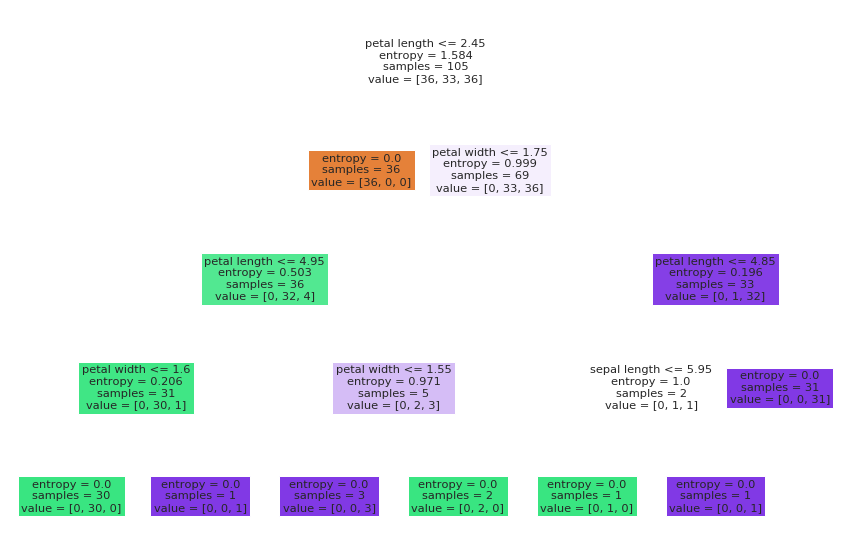

In [ ]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(tree, ax=ax, feature_names=list(X), filled=True);

In [ ]:
toy_X = pd.DataFrame(data={'x_1': [0, 0, 1, 1, 0, 0], 'x_2': [0, 1, 0, 1, 0, 0], 'y': [0, 1, 1, 1, 0, 0]})
toy_X

,x_1,x_2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1
4,0,0,0
5,0,0,0


In [ ]:
toy_y = toy_X['y']
toy_X.drop(columns='y', inplace=True)

In [ ]:
toy_tree = DecisionTreeClassifier(random_state=15, criterion='entropy')
toy_tree.fit(toy_X, toy_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

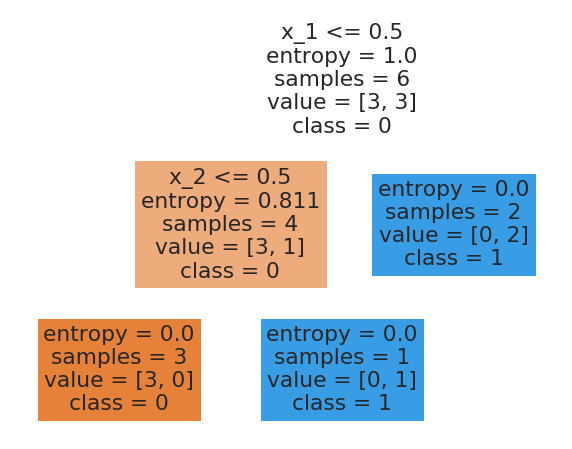

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_tree(toy_tree, ax=ax, feature_names=list(toy_X), class_names=['0', '1'], filled=True);

## Метрики качества

In [ ]:
# Предсказания
pred_tree_train = tree.predict(x_train)
pred_tree_test = tree.predict(x_test)

In [ ]:
pred_tree_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [ ]:
y_test.values

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [ ]:
from sklearn.metrics import accuracy_score

print('Правильность на обучающем наборе: ', round(accuracy_score(y_train, pred_tree_train), 2))
print('Правильность на тестовом наборе: ', round(accuracy_score(y_test, pred_tree_test), 2))

Правильность на обучающем наборе:  1.0
Правильность на тестовом наборе:  0.98


Можем построить матрицу ошибок<br><br>
C[i,j], где i - строки, j - столбцы, показывает пресказания для объекта, который принаджлежит классу i, но модель предсказала, что этот объект - класс j

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_tree_test)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]])

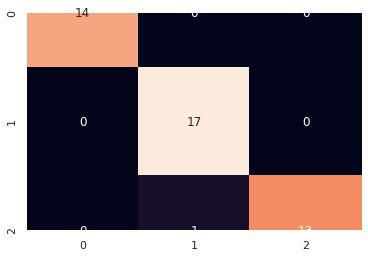

In [ ]:
# Матрица ошибок

sns.heatmap(confusion_matrix(y_test, pred_tree_test), annot=True, cbar=False)

In [ ]:
# Точность и полнота классификационной модели

from sklearn.metrics import classification_report

print(classification_report(y_test, pred_tree_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
petal = iris[['petal length', 'petal width', 'species']]
sepal = iris[['sepal length', 'sepal width', 'species']]

In [ ]:
train_x_p, test_x_p, train_y_p, test_y_p = train_test_split(petal[['petal width','petal length']],
                                                            petal.species, test_size=0.3, random_state=0)

train_x_s, test_x_s, train_y_s, test_y_s = train_test_split(sepal[['sepal width','sepal length']],
                                                            sepal.species, test_size=0.3, random_state=0)

In [ ]:
train_x_p.shape, test_x_p.shape, train_y_p.shape, test_y_p.shape 

((105, 2), (45, 2), (105,), (45,))

In [ ]:
train_x_s.shape, test_x_s.shape, train_y_s.shape, test_y_s.shape

((105, 2), (45, 2), (105,), (45,))

In [ ]:
tree = DecisionTreeClassifier()

tree.fit(train_x_p, train_y_p) 
pred = tree.predict(test_x_p) 
print('Правильность на тестовом наборе:', round(accuracy_score(pred, test_y_p), 2))

tree.fit(train_x_s, train_y_s) 
pred = tree.predict(test_x_s) 
print('Правильность на тестовом наборе:', round(accuracy_score(pred, test_y_s), 2))

Правильность на тестовом наборе: 0.96
Правильность на тестовом наборе: 0.64


Используя признаки petal для обучения, модель показывает лучший результат<br>
Это ожидаемо, так как, из корреляционной матрицы видим, что корреляция между sepal width и sepal length очень слабая, а между petal width и petal length - высокая